In [35]:
import tensorflow as tf
import os

In [36]:
import cv2
import imghdr

In [37]:
data_dir ='data'
os.listdir(data_dir)

['Bike', 'Car', 'Jet']

In [38]:
image_exts = ['jpeg','jpg','bmp','png']

In [39]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imaghdr.what(image_path)
            if tip not in image_exts:
                print("Image not in exg list{}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image{}'.format(image_path))
            #os.remove(image_path)

Issue with imagedata\Bike\1975-suzuki-500cc-barry-sheene-at-mallory-park-creator-unknown.jpg
Issue with imagedata\Bike\1988-suzuki-gsxr-750-artist-unknown.jpg
Issue with imagedata\Bike\1988-suzuki-gsxr-750-artist-unknown2.jpg
Issue with imagedata\Bike\1988-suzuki-gsxr-750-artist-unknown3.jpg
Issue with imagedata\Bike\1988-suzuki-gsxr-750-artist-unknown4.jpg
Issue with imagedata\Bike\1999-suzuki-hayabusa-gsx-1300r-artist-unknown.jpg
Issue with imagedata\Bike\1999-suzuki-hayabusa-gsx-1300r-artist-unknown2.jpg
Issue with imagedata\Bike\1999-suzuki-hayabusa-gsx-1300r-artist-unknown3.jpg
Issue with imagedata\Bike\1999-suzuki-hayabusa-gsx-1300r-artist-unknown4.jpg
Issue with imagedata\Bike\2005-suzuki-750r-gsx-artist-unknown.jpg
Issue with imagedata\Bike\2005-suzuki-750r-gsx-artist-unknown2.jpg
Issue with imagedata\Bike\2005-suzuki-750r-gsx-artist-unknown3.jpg
Issue with imagedata\Bike\2008-suzuki-b-king-artist-unknown.jpg
Issue with imagedata\Bike\2008-suzuki-b-king-artist-unknown2.jpg
Issu

Issue with imagedata\Car\the-bugatti-chiron-seen-at-london-concours-each-year-some-of-the-rarest-cars-are-displayed-at.jpg
Issue with imagedata\Car\the-bugatti-chiron-seen-parked-outside-the-park-tower-hotel-in-knightsbridge-london-england.jpg
Issue with imagedata\Car\the-bugatti-chiron-super-sport-seen-at-salon-prive-held-at-blenheim-palace-each-year-some-of.jpg
Issue with imagedata\Car\this-bugatti-chiron-is-displayed-during-the-vienna-autoshow-as-part-of-vienna-holiday-fair-on.jpg
Issue with imagedata\Car\this-photograph-taken-on-september-8-2022-shows-the-front-of-a-bugatti-chiron-sports-car.jpg
Issue with imagedata\Car\topshot-a-lego-made-bugatti-chiron-model-is-presented-during-the-press-days-of-the-paris.jpg
Issue with imagedata\Car\visitors-look-at-the-new-bugatti-chiron-at-the-2017-frankfurt-auto-show-on-september-12-2017.jpg
Issue with imagedata\Car\visitors-look-at-the-new-bugatti-chiron-at-the-2017-frankfurt-auto-show-on-september-12-20172.jpg
Issue with imagedata\Jet\a-f-3

In [40]:
import numpy as np
import matplotlib.pyplot as plt

In [41]:
data = tf.keras.utils.image_dataset_from_directory('data', batch_size=21)

Found 142 files belonging to 3 classes.


In [42]:
data_iterator = data.as_numpy_iterator()

In [43]:
batch = data_iterator.next()

In [44]:
len(batch)

2

In [45]:
batch[0].shape

(21, 256, 256, 3)

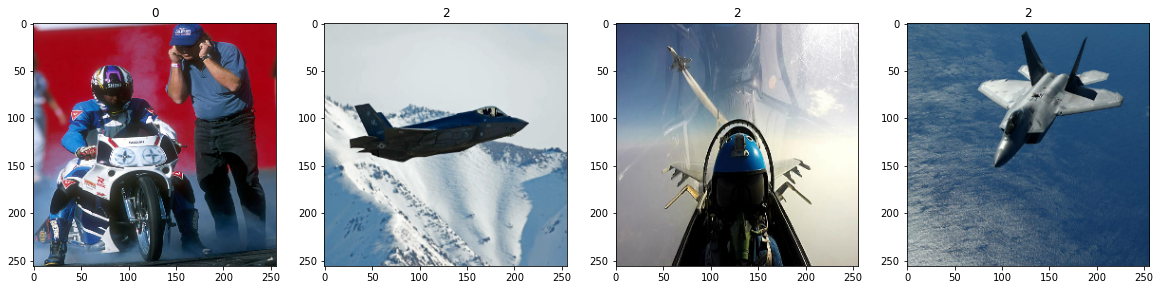

In [46]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [47]:
data = data.map(lambda x, y: (x/255, y))

In [48]:
scaled = data.as_numpy_iterator()
scaled.next()[0].max()

1.0

In [49]:
len(data)

7

In [50]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [51]:
train_size+val_size+test_size

7

In [52]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [54]:
model = Sequential()

model.add(Conv2D(24, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(48, (3,3), 1, activation='relu',))
model.add(MaxPooling2D())

model.add(Conv2D(24, (3,3), 1, activation='relu',))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='sigmoid'))

In [56]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [57]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 24)      672       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 24)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 48)      10416     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 48)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 24)        10392     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 24)      

In [58]:
logdir = 'logs'

In [59]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [60]:
hist = model.fit(train, epochs= 20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


C:\ProgramData\Anaconda3\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


4/4 [==============================] - 10s 1s/step - loss: 1.5254 - accuracy: 0.2976 - val_loss: 0.9816 - val_accuracy: 0.3571
Epoch 2/20
4/4 [==============================] - 4s 1s/step - loss: 0.9722 - accuracy: 0.5238 - val_loss: 0.9244 - val_accuracy: 0.5952
Epoch 3/20
4/4 [==============================] - 6s 2s/step - loss: 0.7385 - accuracy: 0.6667 - val_loss: 0.6322 - val_accuracy: 0.7381
Epoch 4/20
4/4 [==============================] - 6s 1s/step - loss: 0.5769 - accuracy: 0.7500 - val_loss: 0.5649 - val_accuracy: 0.7857
Epoch 5/20
4/4 [==============================] - 4s 968ms/step - loss: 0.3453 - accuracy: 0.8810 - val_loss: 0.4052 - val_accuracy: 0.8571
Epoch 6/20
4/4 [==============================] - 4s 1s/step - loss: 0.2678 - accuracy: 0.9167 - val_loss: 0.3307 - val_accuracy: 0.8810
Epoch 7/20
4/4 [==============================] - 4s 1s/step - loss: 0.2224 - accuracy: 0.9048 - val_loss: 0.1807 - val_accuracy: 0.9048
Epoch 8/20
4/4 [==============================] 

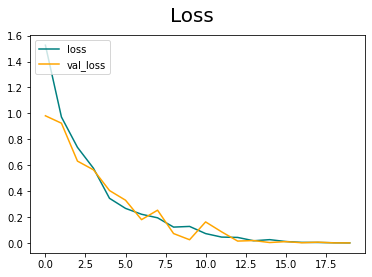

In [61]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

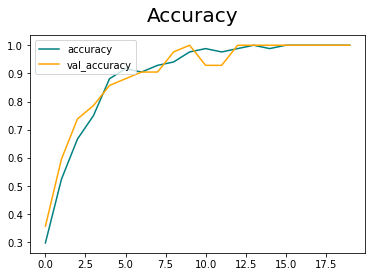

In [62]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [63]:
for batch in test.as_numpy_iterator():
    X, y = batch
    model.evaluate(X,y)

1/1 [==============================] - 0s 155ms/step - loss: 8.2966e-04 - accuracy: 1.0000


In [64]:
from sklearn.metrics import classification_report

for batch in test.as_numpy_iterator():
    X, y = batch
    y_pred = model.predict(X)

y_pred_classes = [np.argmax(element)for element in y_pred]

print('classification Report: \n', classification_report(y,y_pred_classes))

1/1 [==============================] - 0s 276ms/step
classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         6

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16

